# Wealth transfer

In [159]:
#!pip install agentpy

This notebook presents a tutorial for beginners on how to create a simple agent-based model with the [agentpy](https://agentpy.readthedocs.io) package.
It demonstrates how to create a basic model with a custom agent type, run a simulation, record data, and visualize results.

In [160]:
# Model design
import agentpy as ap
import numpy as np
import random

# Visualization
import seaborn as sns

## About the model

The model explores the distribution of wealth under a trading population of agents.
Each agent starts with one unit of wealth.
During each time-step, each agents with positive wealth
randomly selects a trading partner and gives them one unit of their wealth.
We will see that this random interaction will create an inequality of wealth that
follows a [Boltzmann distribution](http://www.phys.ufl.edu/~meisel/Boltzmann.pdf).
The original version of this model been written in [MESA](https://mesa.readthedocs.io/)
and can be found [here](https://mesa.readthedocs.io/en/master/tutorials/intro_tutorial.html).

## Model definition

We start by defining a new type of `Agent` with the following methods:

- `setup()` is called automatically when a new agent is created and initializes a variable `wealth`.
- `wealth_transfer()` describes the agent's behavior at every time-step and will be called by the model.

In [161]:
class WealthAgent(ap.Agent):

    """
    An agent with wealth
    - En este agente se implementará el algoritmo general de un
    agente con memoria, y tendrá una utilidad definida.
    - El agente será útil entre mejor distribuida esté su riqueza entre los
    demás agentes.
    """

    def see(self,e):
        """
        La función de percepción.
        Asumimos que 'e' es la lista de agentes.
        """

        # Se percibe a la lista de agentes y a la cartera de cada uno
        per = e.random()
        return per

    def brf(self, per): 
        self.beliefs['partner'] = per
        
    def opt(self): # donation 
        if self.beliefs['partner'] and self.wealth > 0: 
            self.desires.append("Donar") 
    
    def filter(self): 
        self.intentions.append(self.desired[0])
    
    def plan(self):
        self.the_plan = self.wealth_transfer
    
    def BDI(self):
        per = self.see(self.model.agents)
        self.brf(per)
        self.opt()
        self.filter() 
        self.plan()
    
    def next(self):
        pass 
    
    def action(self):
        for op in self.the_plan:
            op() 
    
    def setup(self):
        self.wealth = 1
        self.beliefs = {'partner': None}
        self.desires = [] 
        self.intentions = [] 
    
    def next(self, per):
        """
        La función 'next' para tomar decisiones con respecto a experiencias
        pasadas. 'self.I' es el estado interno del agente, que contiene atributos.
        'per' es lo percibido, en este caso la lista de agentes y sus carteras.
        Aquí se quiere dar todas las monedas.
        """
        self.utility = 1 - self.wealth / self.model.p.agents
        self.I['target'] = per


    def action(self):
        """
        La función de acción. aquí se escoge una acción y se ejecuta.
        """
        if self.wealth > 0:
            #Se da una cantidad de riqueza proporcional a la utilidad
            self.I['target'].wealth += 1 - self.utility
            self.wealth-= 1-self.utility

    def execute(self):
        """
        Función para ejecutar el algoritmo del agente.
        'see' -> 'next' -> 'action'
        """
        per = self.see(self.model.agents)
        self.next(per)
        self.action()


    def setup(self):
        self.beliefs = {'partner': None} 
        self.wealth = 1
        self.actions = {self.wealth_transfer} 

    def wealth_transfer(self):

        if self.wealth > 0:

            partner = self.model.agents.random()
            partner.wealth += 1
            self.wealth -= 1

Next, we define a method to calculate the [Gini Coefficient](https://en.wikipedia.org/wiki/Gini_coefficient),
which will measure the inequality among our agents.

In [162]:
def gini(x):

    """ Calculate Gini Coefficient """
    # By Warren Weckesser https://stackoverflow.com/a/39513799

    x = np.array(x)
    mad = np.abs(np.subtract.outer(x, x)).mean()  # Mean absolute difference
    rmad = mad / np.mean(x)  # Relative mean absolute difference
    return 0.5 * rmad

Finally, we define our [`Model`](https://agentpy.readthedocs.io/en/stable/reference_models.html) with the following methods:

- `setup` defines how many agents should be created at the beginning of the simulation.
- `step` calls all agents during each time-step to perform their `wealth_transfer` method.
- `update` calculates and record the current Gini coefficient after each time-step.
- `end`, which is called at the end of the simulation, we record the wealth of each agent.

In [163]:
class WealthModel(ap.Model):

    """ A simple model of random wealth transfers """

    def setup(self):

        self.agents = ap.AgentList(self, self.p.agents, WealthAgent)

    def step(self):

        # aquí ejecutamos el algoritmo del agente (para todos los agentes)
        self.agents.execute()
        #self.agents.wealth_transfer()

    def update(self):

        self.record('Gini Coefficient', gini(self.agents.wealth))

    def end(self):

        self.agents.record('wealth')

## Simulation run

To prepare, we define parameter dictionary with a [random seed](https://agentpy.readthedocs.io/en/stable/guide_random.html), the number of agents, and the number of time-steps.

In [164]:
parameters = {
    'agents': 100,
    'steps': 100,
    'seed': 42,
}

To perform a simulation, we initialize our model with a given set of parameters and call [`Model.run()`](https://agentpy.readthedocs.io/en/stable/reference_models.html).

In [165]:
model = WealthModel(parameters)
results = model.run()


Completed: 1 steps
Completed: 2 steps
Completed: 3 steps
Completed: 4 steps
Completed: 5 steps
Completed: 6 steps
Completed: 7 steps
Completed: 8 steps
Completed: 9 steps
Completed: 10 steps
Completed: 11 steps
Completed: 12 steps
Completed: 13 steps
Completed: 14 steps
Completed: 15 steps
Completed: 16 steps
Completed: 17 steps
Completed: 18 steps
Completed: 19 steps
Completed: 20 steps
Completed: 21 steps
Completed: 22 steps
Completed: 23 steps
Completed: 24 steps
Completed: 25 steps
Completed: 26 steps
Completed: 27 steps
Completed: 28 steps
Completed: 29 steps
Completed: 30 steps
Completed: 31 steps
Completed: 32 steps
Completed: 33 steps
Completed: 34 steps
Completed: 35 steps
Completed: 36 steps
Completed: 37 steps
Completed: 38 steps
Completed: 39 steps
Completed: 40 steps
Completed: 41 steps
Completed: 42 steps
Completed: 43 steps
Completed: 44 steps
Completed: 45 steps
Completed: 46 steps
Completed: 47 steps
Completed: 48 steps
Completed: 49 steps
Completed: 50 steps
Complete

## Output analysis

The simulation returns a [`DataDict`](https://agentpy.readthedocs.io/en/stable/reference_output.html) with our recorded variables.

In [166]:
results

DataDict {
'info': Dictionary with 9 keys
'parameters': 
    'constants': Dictionary with 3 keys
'variables': 
    'WealthModel': DataFrame with 1 variable and 101 rows
    'WealthAgent': DataFrame with 1 variable and 100 rows
'reporters': DataFrame with 1 variable and 1 row
}

The output's `info` provides general information about the simulation.

In [167]:
results.info

{'model_type': 'WealthModel',
 'time_stamp': '2024-08-13 00:08:03',
 'agentpy_version': '0.1.5',
 'python_version': '3.10.',
 'experiment': False,
 'completed': True,
 'created_objects': 100,
 'completed_steps': 100,
 'run_time': '0:00:00.203068'}

To explore the evolution of inequality,
we look at the recorded [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) of the model's variables.

In [168]:
results.variables.WealthModel.head()

,Gini Coefficient
t,
0,0.000000
1,0.005381
2,0.007700
3,0.008764
4,0.010550


To visualize this data,
we can use [`DataFrame.plot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).

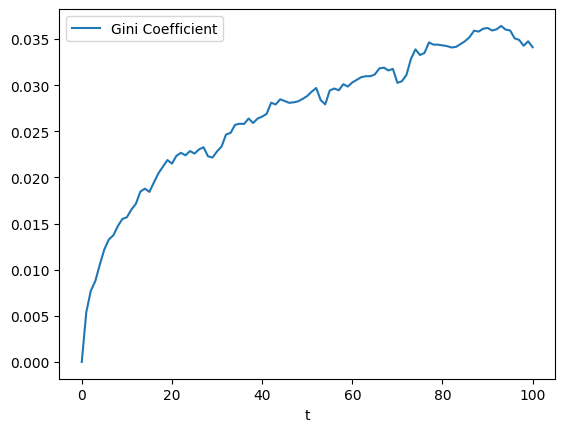

In [169]:
data = results.variables.WealthModel
ax = data.plot()

To look at the distribution at the end of the simulation,
we visualize the recorded agent variables with [seaborn](https://seaborn.pydata.org/).

ValueError: `bins` must be positive, when an integer

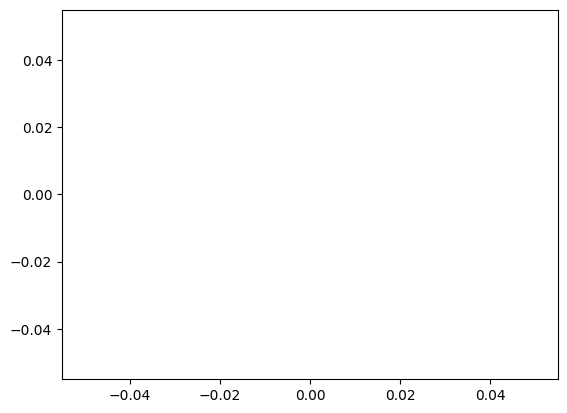

In [170]:
sns.histplot(data=results.variables.WealthAgent, binwidth=1);

The result resembles a [Boltzmann distribution](http://www.phys.ufl.edu/~meisel/Boltzmann.pdf).